<a href="https://colab.research.google.com/github/LillyKig/Lillys-Projects/blob/main/natural_language_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('/content/Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [31]:
print(dataset.columns)

Index(['Review', 'Liked'], dtype='object')


## Cleaning the texts

In [4]:
#Stemming
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

## Creating the Bag of Words model

In [6]:
#Tokenization
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [7]:
len(X[0])

1500

## Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Training the Naive Bayes model on the Training set

In [9]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## Predicting the Test set results

In [10]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]

## Making the Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[55 42]
 [12 91]]


0.73

In [12]:
print(X_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.57      0.67        97
           1       0.68      0.88      0.77       103

    accuracy                           0.73       200
   macro avg       0.75      0.73      0.72       200
weighted avg       0.75      0.73      0.72       200




#Predicting if a single review is positive or negative

###Positive review


Use our model to predict if the following review:

"I love this restaurant so much"

is positive or negative.

In [13]:
new_review = 'I love this restaurant so much'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_X_test)
print(new_y_pred)

[1]


The review was correctly predicted as positive by our model.

#Negative review

Use our model to predict if the following review:

"I hate this restaurant so much"

is positive or negative.

In [14]:
new_review = 'I hate this restaurant so much'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = classifier.predict(new_X_test)
print(new_y_pred)

[0]


The review was correctly predicted as negative by our model.

In [34]:
positive_reviews = dataset[dataset["Liked"] == 1]
positive_count = positive_reviews.shape[0]
print(f"Number of positive reviews: {positive_count}")

Number of positive reviews: 500


In [36]:
negative_reviews = dataset[dataset["Liked"] == 0]
negative_count = negative_reviews.shape[0]
print(f"Number of negative reviews: {negative_count}")

Number of negative reviews: 500


In [40]:
from collections import Counter


# Count the most common words
word_counts = Counter(corpus)
most_common_words = word_counts.most_common(10)  # Top 10 words

# Display the most common words
print("Most Common Terms:")
for word, count in most_common_words:
    print(f"{word}: {count}")

Most Common Terms:
back: 3
food good: 3
disappoint: 3
love place: 3
return: 2
delici: 2
go back: 2
food terribl: 2
mistak: 2
not back: 2


#Plot Wordcloud

In [45]:
positive = dataset[dataset['Liked']==1]
positive

,Review,Liked
0,Wow... Loved this place.,1
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
8,The fries were great too.,1
9,A great touch.,1
...,...,...
899,"Overall, a great experience.",1
901,Their regular toasted bread was equally satisf...,1
907,The chips and sals a here is amazing!!!!!!!!!!...,1
909,This is my new fav Vegas buffet spot.,1


In [46]:
negative = dataset[dataset['Liked']==0]
negative

,Review,Liked
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [47]:
sentences=positive['Review'].tolist()
len(sentences)

500

In [48]:
sentences_as_one_string="".join(sentences)
sentences_as_one_string

'Wow... Loved this place.Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.The selection on the menu was great and so were the prices.The fries were great too.A great touch.Service was very prompt.I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!Highly recommended.The food, amazing.Service is also cute.I could care less... The interior is just beautiful.So they performed.That\'s right....the red velvet cake.....ohhh this stuff is so good.This hole in the wall has great Mexican street tacos, and friendly staff.Also there are combos like a burger, fries, and beer for 23 which is a decent deal.I found this place by accident and I could not be happier.Overall, I like this place a lot.The only redeeming quality of the restaurant was that it was very inexpensive.Ample portions and good prices.My first visit to Hiro was a delight!The shrimp tender and moist.On a positive note, our server was very attentive and provided great service.The only thi

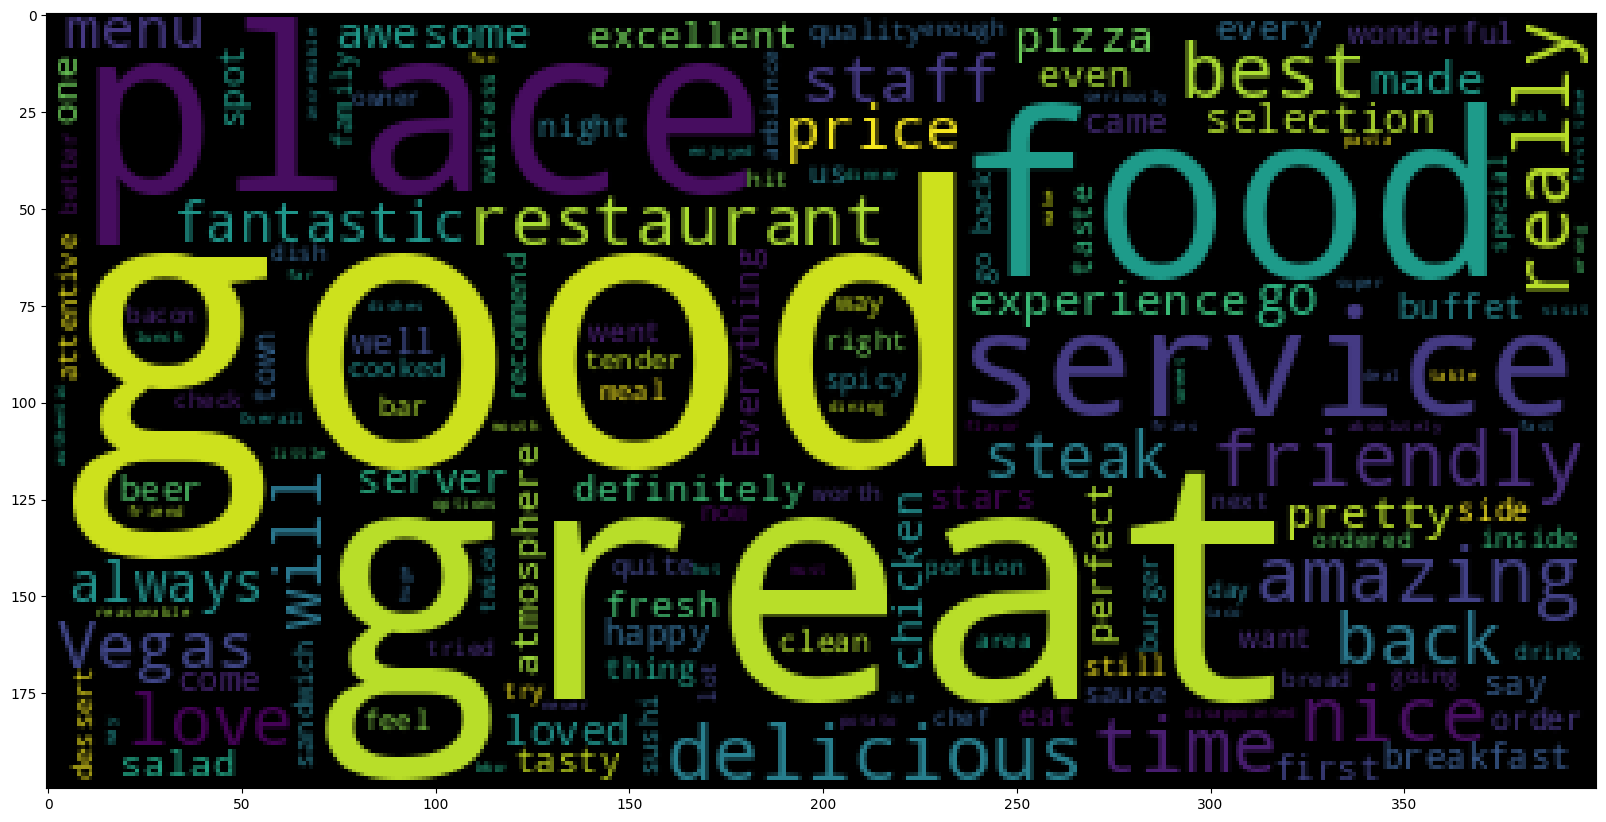

In [49]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [51]:
negative_sentences=negative['Review'].tolist()
len(sentences)

500

In [53]:
negative_sentences_as_one_string="".join(negative_sentences)
negative_sentences_as_one_string

'Crust is not good.Not tasty and the texture was just nasty.Now I am getting angry and I want my damn pho.Honeslty it didn\'t taste THAT fresh.)The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.Would not go back.The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.I was disgusted because I was pretty sure that was human hair.I was shocked because no signs indicate cash only.Waitress was a little slow in service.This place is not worth your time, let alone Vegas.did not like at all.The Burrittos Blah!- They never brought a salad we asked for.Took an hour to get our food only 4 tables in restaurant my food was Luke warm, Our sever was running around like he was totally overwhelmed.The worst was the salmon sashimi.This was like the final blow!seems like a good quick place to grab a bite of some familiar pub food, but do yourself a favor and look elsewhere.Poor service, the waiter mad

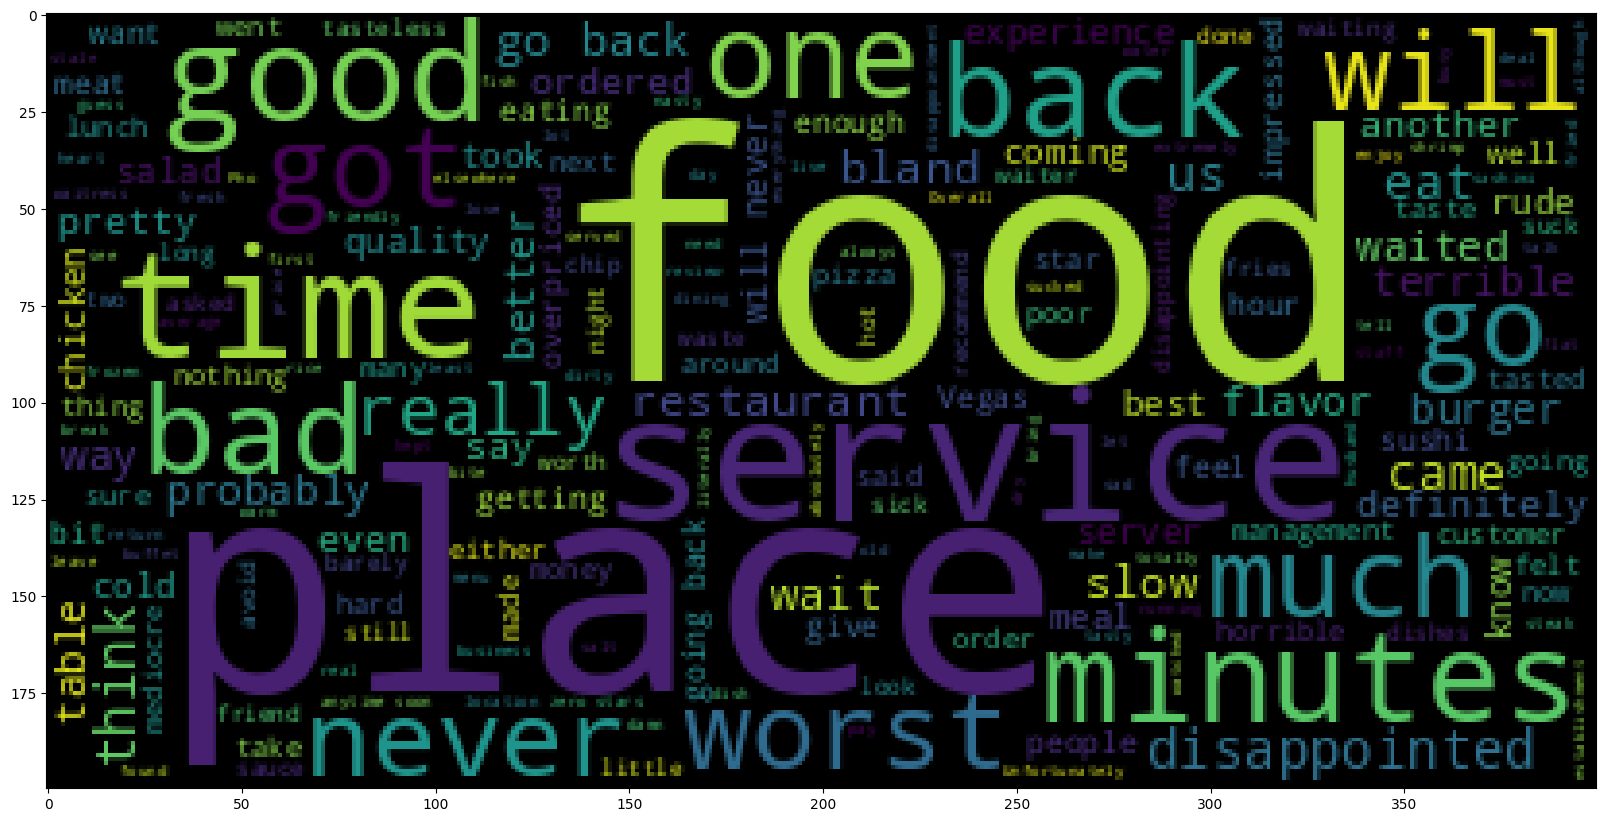

In [54]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))